In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [10]:
# Get only the cubes that have our line of interest in them
mol_tag = 58003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=98>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2        1 / cm                                     
 float64   float64 float64 int64 float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- -------- ----- ----- ----- -------- --------
 85573.961  0.2692 -5.6774     3 187.0494   816 58003  1404 2518 8 0 2517 9 1
85587.1167  0.9791 -6.5704     3 294.8647   130 58003  1404 321913 1 321814 1
 85590.388   0.935 -5.6674     3 294.8892   999 58003  1404 321913 0 321814 1
85591.8722  0.1101 -8.7747     3  64.9884   496 58003  1404 15 9 6 0 1412 2 1
85592.1905  1.0675 -6.0934     3 294.9137   390 58003  1404 321913 0 321814 0
85593.1392   0.959 -6.2693     3 294.8649   260 58003  1404 321913 1 321814 2
85627.5393  0.2538 -6.5247     3 187.0394   102 58003  1404 2518 8 1 2517 9 1
85755.8168  0.0453 -7.7284     3  18.3626   272 58003  1404  8 6 2 0  7 7 1 1
85855.1148  0.1218 -5.8689     3 148.1992   4

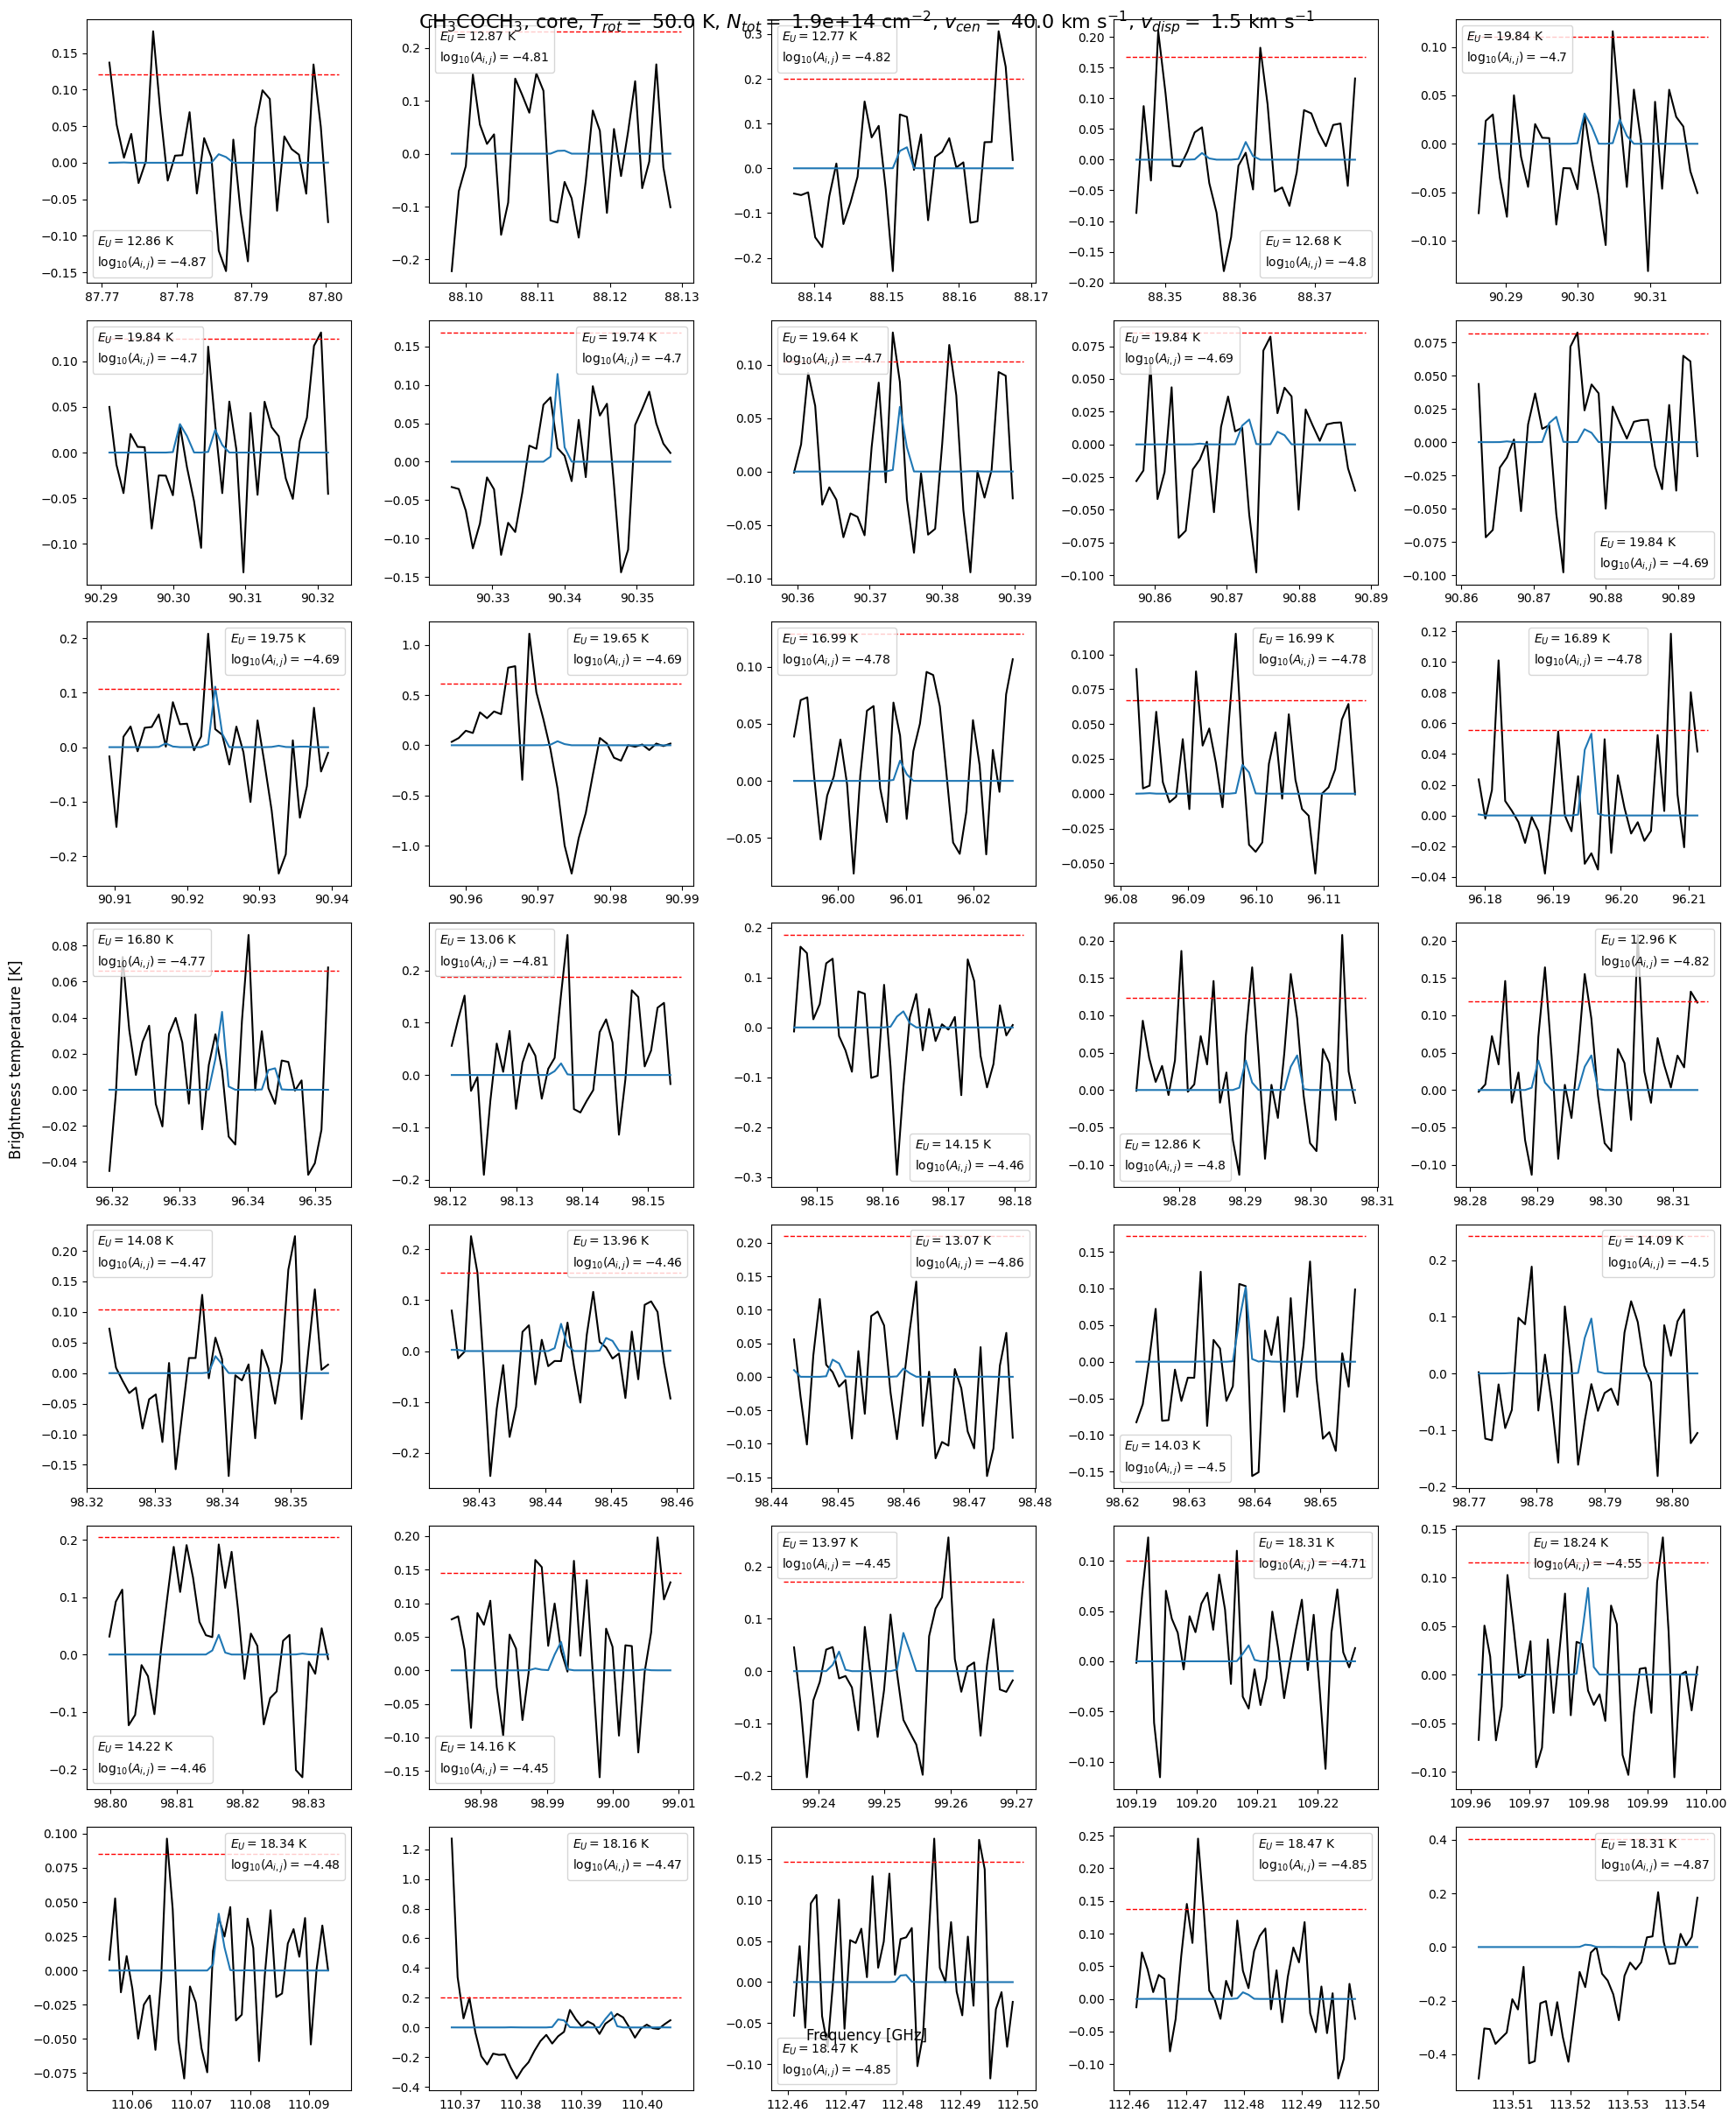

In [28]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.9e+14, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=25,
               nrows=7, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$COCH$_3$', 
               extr_type="coord", crd=crd, EU_cutoff_K=20, show_2_sigma=True)

In [29]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

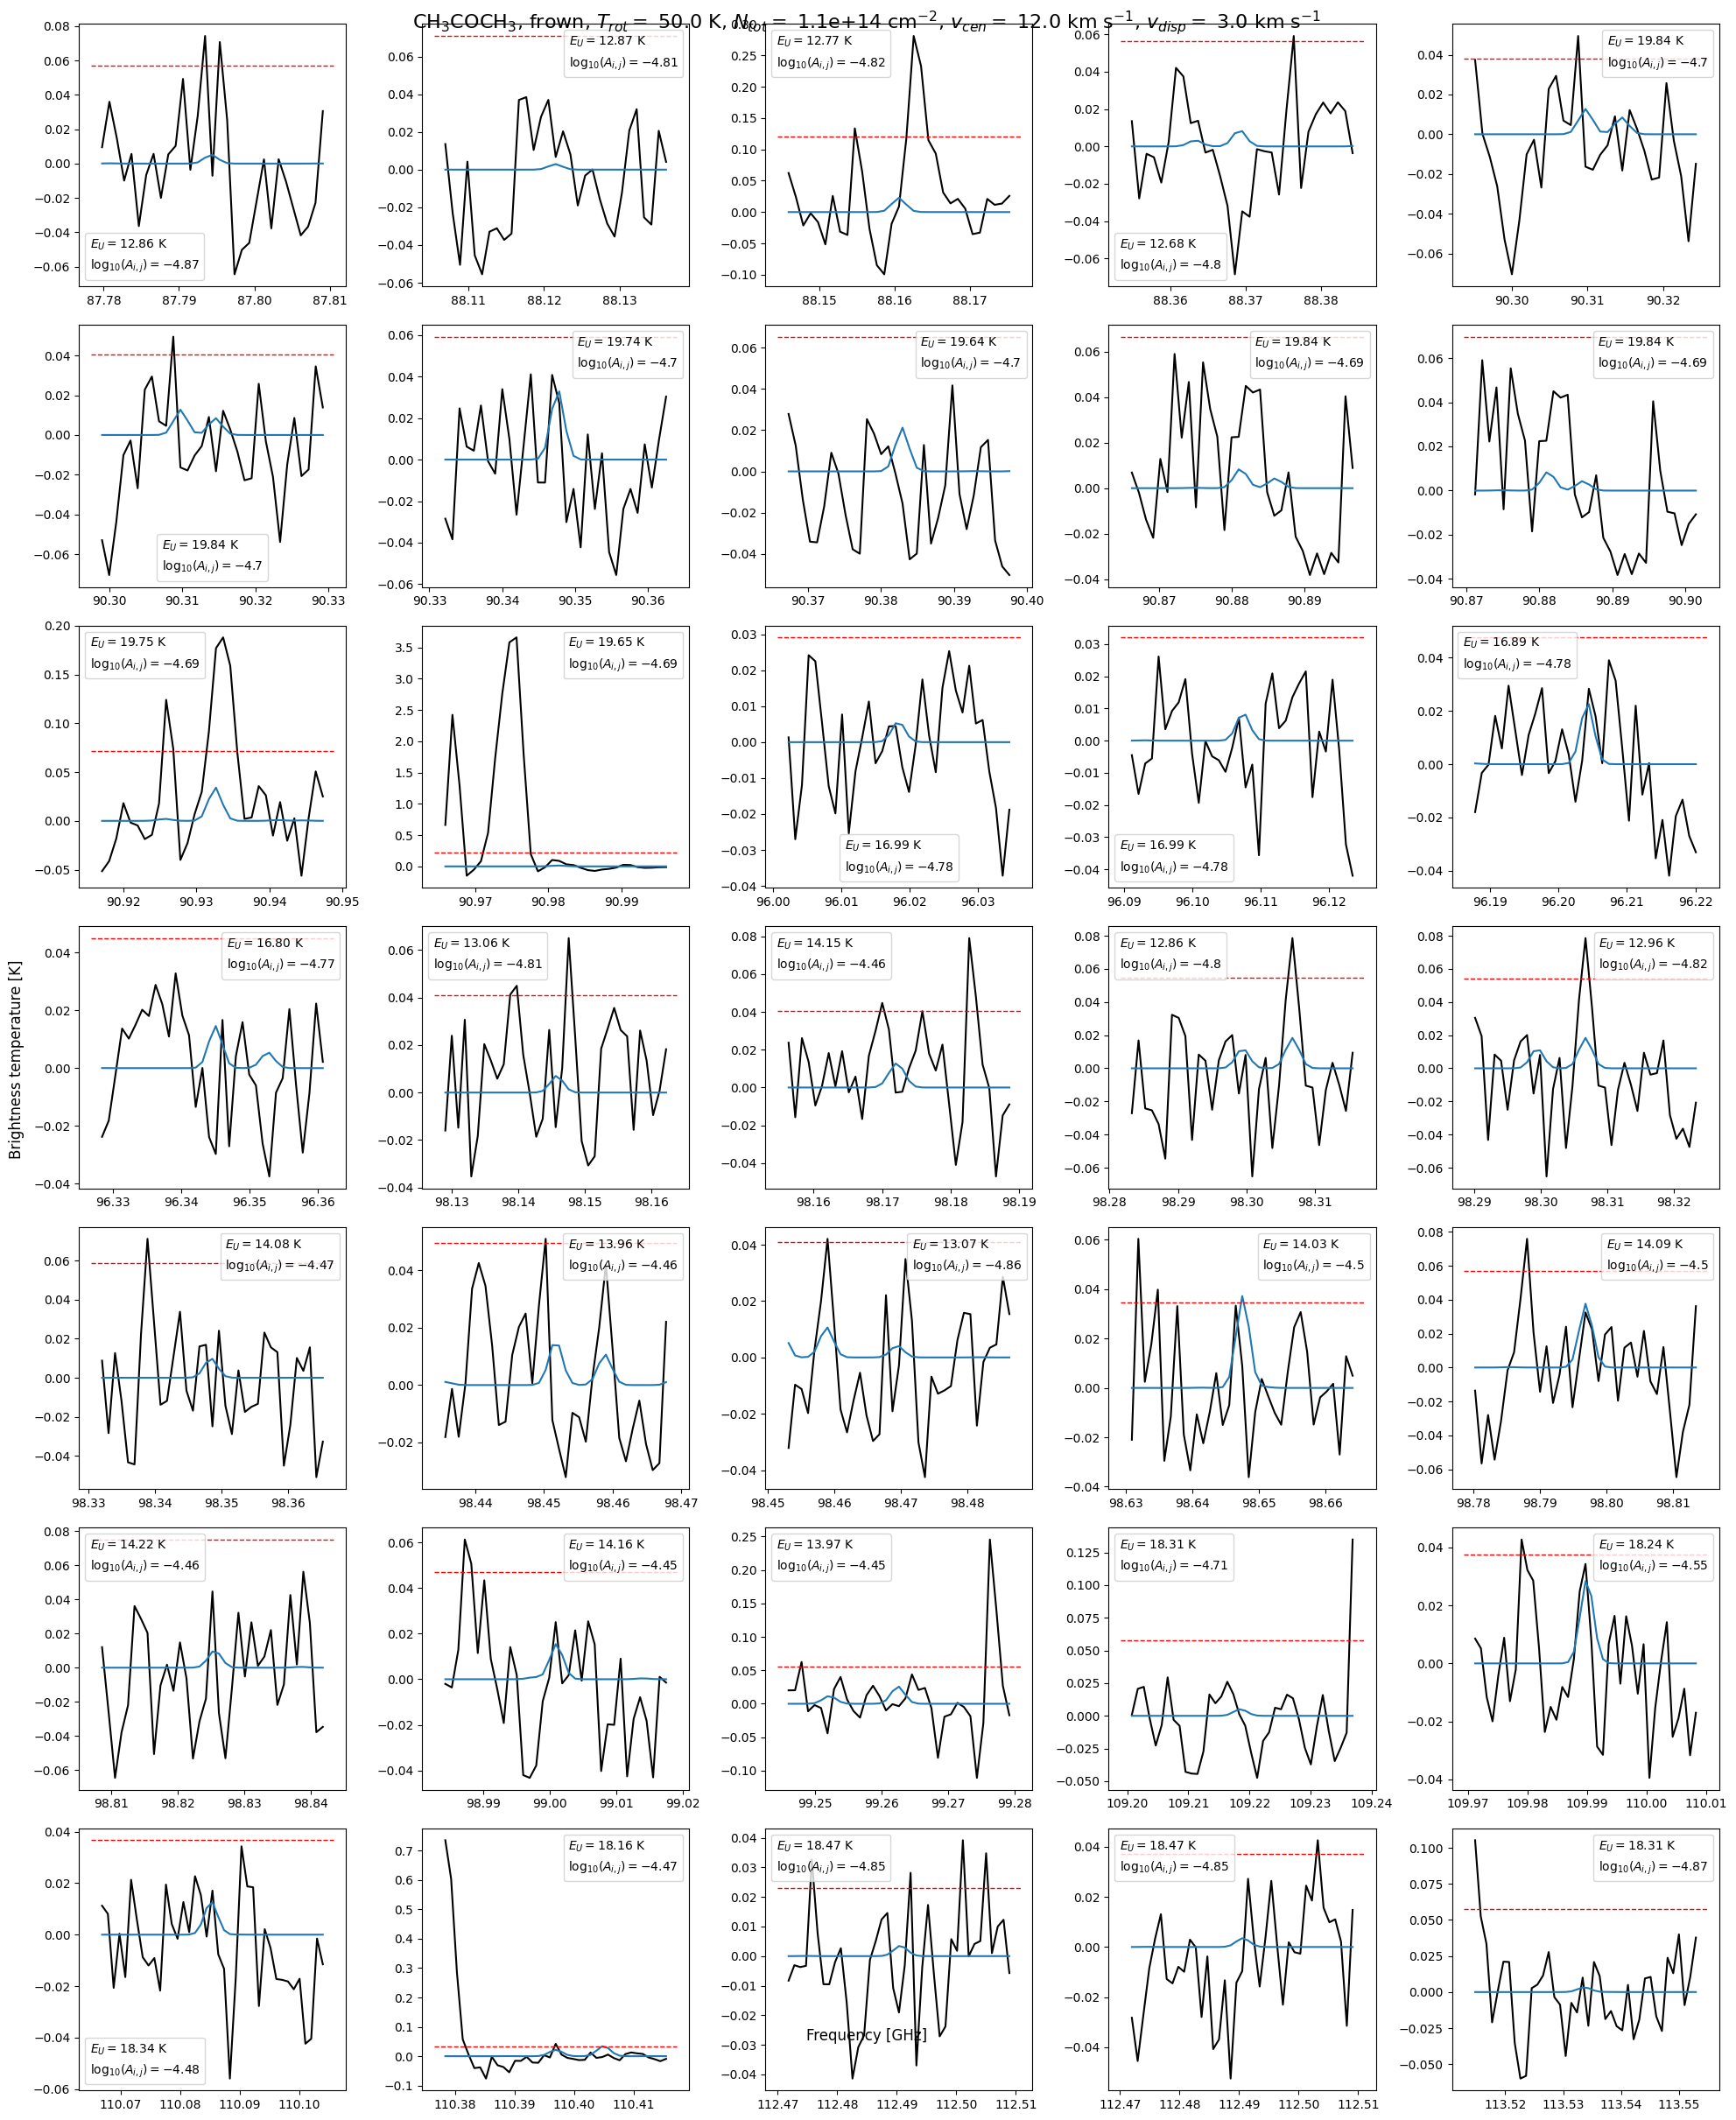

In [38]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.1e+14, v_cen = 12.*u.km/u.s, v_disp = 3*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=25, 
                       nrows=7, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$COCH$_3$', 
                       extr_type="reg", just_data=False, EU_cutoff_K=20, show_2_sigma=True, return_freqs=True)

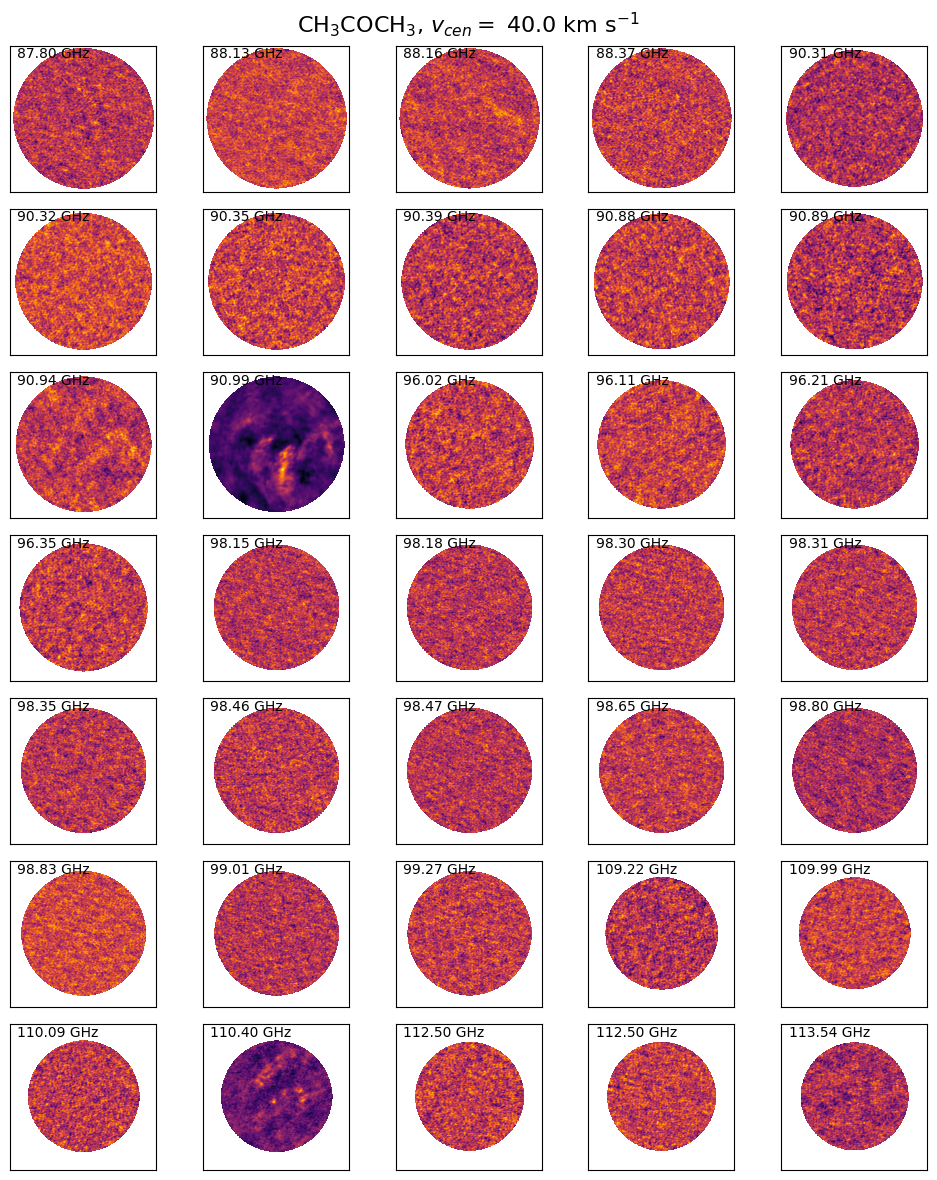

In [39]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=12, nrows=7, ncols=5, name_for_plot=f'CH$_3$COCH$_3$')

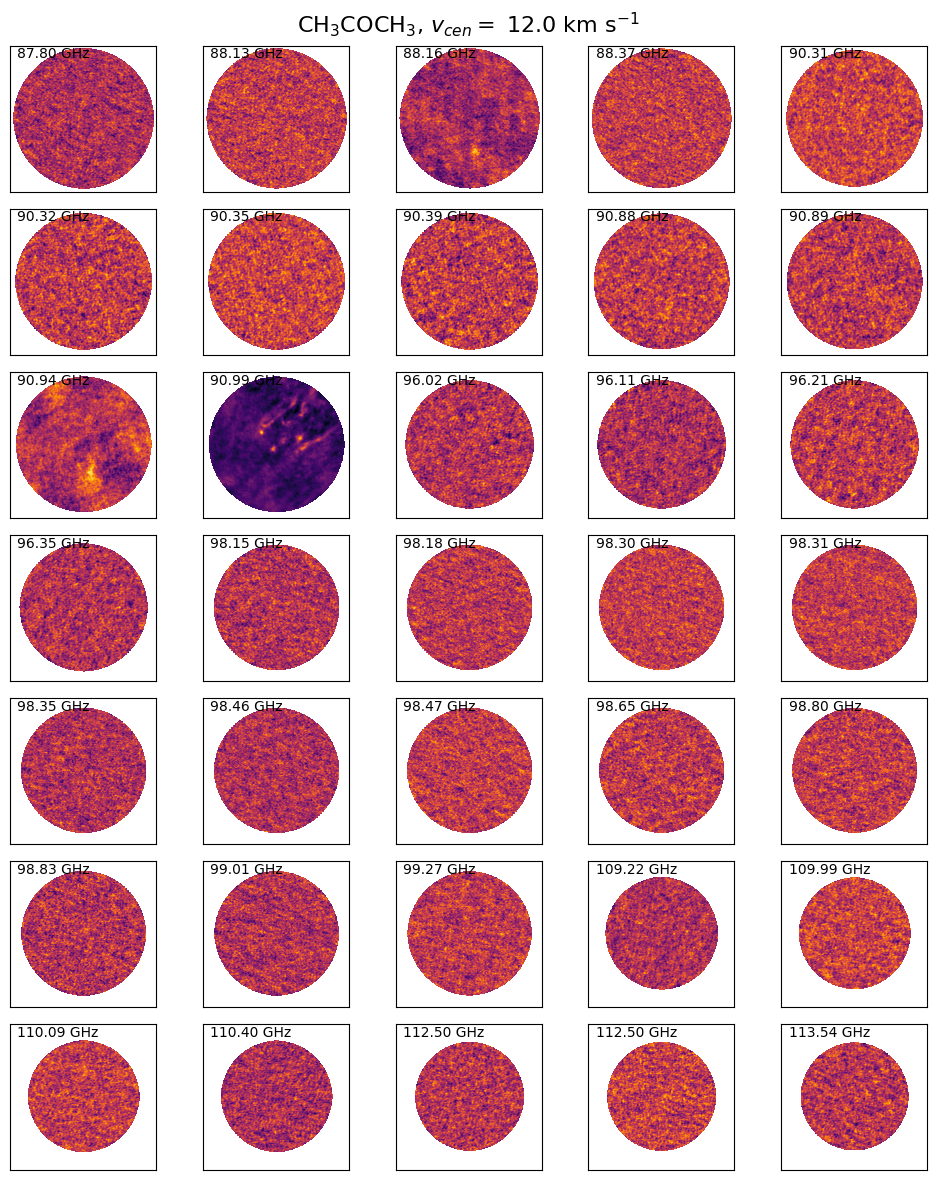

In [40]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=12, nrows=7, ncols=5, name_for_plot=f'CH$_3$COCH$_3$')